In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Constants
e = 1.602176634e-19  # Elementary charge (C)
m_e = 9.10938356e-31 # Electron mass (kg)
hbar = 1.054571817e-34 # Reduced Planck's constant (J·s)
gamma_1 = 0.39 * e    # Interlayer coupling energy (J)
B_const = 18          # Constant Magnetic field (T)
E_const = 35 * 1e6    # Constant Electric Field (mV/nm) to (V/m)
d = 3.35e-10
m_eff = 0.041 * m_e
omega_B_const = e * B_const / m_eff # Cyclotron frequency (rad/s)

### Considering Electric Field to be 0

In [3]:
# Magnetic field values
B_values = np.linspace(0, 30, 100)  # 100 values between 0 and 30T
n_values = list(range(11))  # n from 0 to 20  

# Store eigenvalues for all n
all_eigenvalues = np.zeros((len(n_values), len(B_values), 4))

In [4]:
# Function to construct the Hamiltonian matrix
def hamiltonian_matrix(n, omega_B):
    sqrt_n = np.sqrt(n)
    sqrt_n_plus_1 = np.sqrt(n + 1)
    hbar_omega_B_n = hbar * omega_B * sqrt_n
    hbar_omega_B_n_plus_1 = hbar * omega_B * sqrt_n_plus_1
    
    H = np.array([
        [0, hbar_omega_B_n, 0, 0],
        [hbar_omega_B_n_plus_1, 0, gamma_1, 0],
        [0, gamma_1, 0, hbar_omega_B_n],
        [0, 0, hbar_omega_B_n_plus_1, 0]
    ])
    return H

In [5]:
# Compute eigenvalues
for i, n in enumerate(n_values):
    for j, B in enumerate(B_values):
        omega_B = e * B / m_eff
        H = hamiltonian_matrix(n, omega_B)
        eigvals = np.linalg.eigvalsh(H) / e  # Convert to eV
        all_eigenvalues[i, j, :] = eigvals

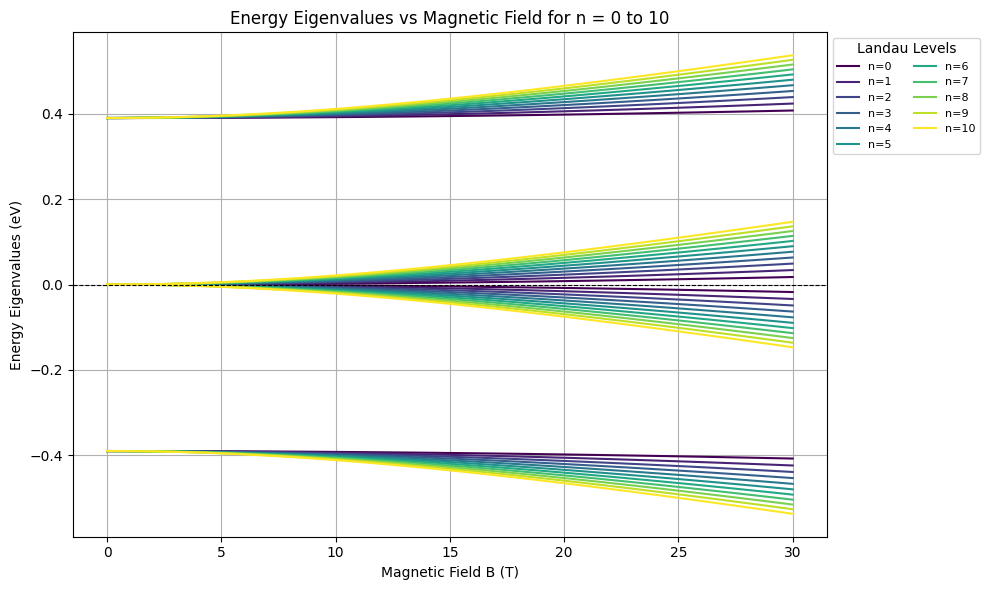

In [6]:
# Plotting

fig, ax = plt.subplots(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(n_values)))  # Color map for better visualization

for i, n in enumerate(n_values):
    for mode in range(4):  # There are 4 eigenvalues per n
        ax.plot(B_values, all_eigenvalues[i, :, mode], color=colors[i], label=f'n={n}' if mode == 0 else "")

ax.set_xlabel('Magnetic Field B (T)')
ax.set_ylabel('Energy Eigenvalues (eV)')
ax.set_title('Energy Eigenvalues vs Magnetic Field for n = 0 to 10')
ax.axhline(0, color='k', linewidth=0.8, linestyle='--')  # Show zero energy level
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=2, fontsize=8, title="Landau Levels")
ax.grid()

plt.tight_layout()

# Save the figure
plt.savefig("energy_vs_B.pdf", dpi=300, bbox_inches="tight")  # Saves as Pdf

plt.show()

### Considering non-zero Electric Field

In [7]:
E_values = np.linspace(0, 50, 100)

In [8]:
# Function to construct the Hamiltonian matrix
## I have defined 2 Hamiltonian functions. In the first defination, B is fixed while E is varying. In the second defination, vice-versa.

def hamiltonian_matrix_B_const(n, potential_diff, omega_B_const):
    sqrt_n = np.sqrt(n)
    sqrt_n_plus_1 = np.sqrt(n + 1)
    hbar_omega_B_const_n = hbar * omega_B_const * sqrt_n
    hbar_omega_B_const_n_plus_1 = hbar * omega_B_const * sqrt_n_plus_1
    
    H_B_const = np.array([
        [potential_diff, hbar_omega_B_const_n, 0, 0],
        [hbar_omega_B_const_n_plus_1, potential_diff, gamma_1, 0],
        [0, gamma_1, - potential_diff, hbar_omega_B_const_n],
        [0, 0, hbar_omega_B_const_n_plus_1, - potential_diff]
    ])
    return H_B_const

def hamiltonian_matrix_E_const(n, potential_diff_const ,omega_B):
    sqrt_n = np.sqrt(n)
    sqrt_n_plus_1 = np.sqrt(n + 1)
    hbar_omega_B_n = hbar * omega_B * sqrt_n
    hbar_omega_B_n_plus_1 = hbar * omega_B * sqrt_n_plus_1
    
    H_E_const = np.array([
        [potential_diff_const, hbar_omega_B_n, 0, 0],
        [hbar_omega_B_n_plus_1, potential_diff_const, gamma_1, 0],
        [0, gamma_1, - potential_diff_const, hbar_omega_B_n],
        [0, 0, hbar_omega_B_n_plus_1, - potential_diff_const]
    ])
    return H_E_const

In [9]:
# Store eigenvalues for all n

all_eigenvalues_E_const = np.zeros((len(n_values), len(B_values), 4))
all_eigenvalues_B_const = np.zeros((len(n_values), len(E_values), 4))

In [10]:
# Compute eigenvalues considering E is constant

potential_diff_const = e * E_const * d

for i, n in enumerate(n_values):
    for j, B in enumerate(B_values):
        omega_B = e * B / m_eff
        H_E_const = hamiltonian_matrix_E_const(n, potential_diff_const ,omega_B)
        eigvals_E_const = np.linalg.eigvalsh(H_E_const) / e  # Convert to eV
        all_eigenvalues_E_const[i, j, :] = eigvals_E_const

# Compute eigenvalues considering B is constant

omega_B_const = e * B_const / m_eff

for i, n in enumerate(n_values):
    for j, E in enumerate(E_values):
        potential_diff = e * E * 1e6 * d  ## converting unit of E from mV/nm to V/m
        H_B_const = hamiltonian_matrix_B_const(n, potential_diff ,omega_B_const)
        eigvals_B_const = np.linalg.eigvalsh(H_B_const) / e  # Convert to eV
        all_eigenvalues_B_const[i, j, :] = eigvals_B_const

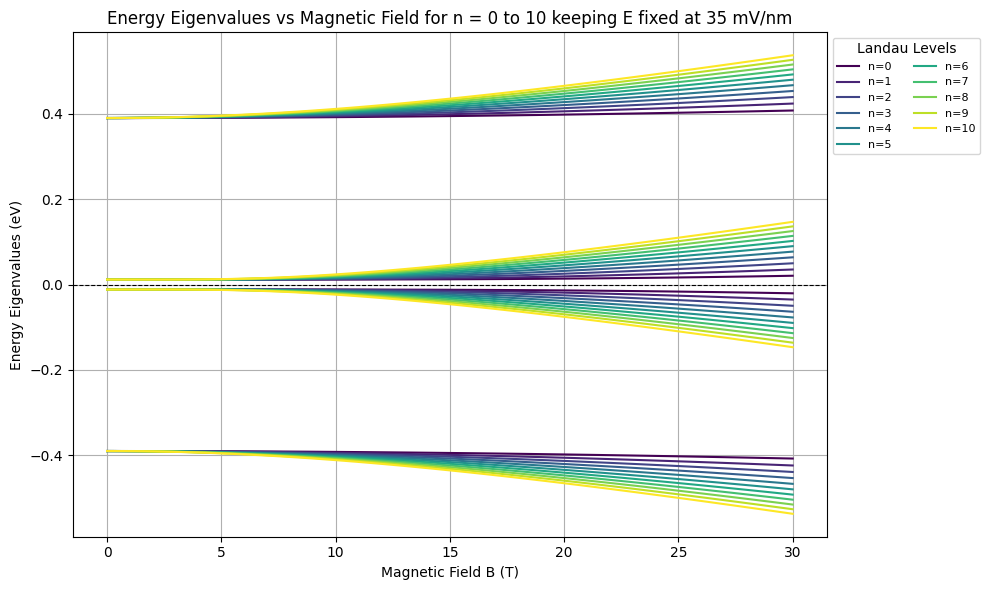

In [11]:
# Plotting

fig, ax = plt.subplots(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(n_values)))  # Color map for better visualization

for i, n in enumerate(n_values):
    for mode in range(4):  # There are 4 eigenvalues per n
        ax.plot(B_values, all_eigenvalues_E_const[i, :, mode], color=colors[i], label=f'n={n}' if mode == 0 else "")

ax.set_xlabel('Magnetic Field B (T)')
ax.set_ylabel('Energy Eigenvalues (eV)')
ax.set_title('Energy Eigenvalues vs Magnetic Field for n = 0 to 10 keeping E fixed at 35 mV/nm')
ax.axhline(0, color='k', linewidth=0.8, linestyle='--')  # Show zero energy level
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=2, fontsize=8, title="Landau Levels")
ax.grid()
plt.tight_layout()

# Save the figure
plt.savefig("energy_vs_B_at_const_E.pdf", dpi=300, bbox_inches="tight")  # Saves as Pdf

plt.show()

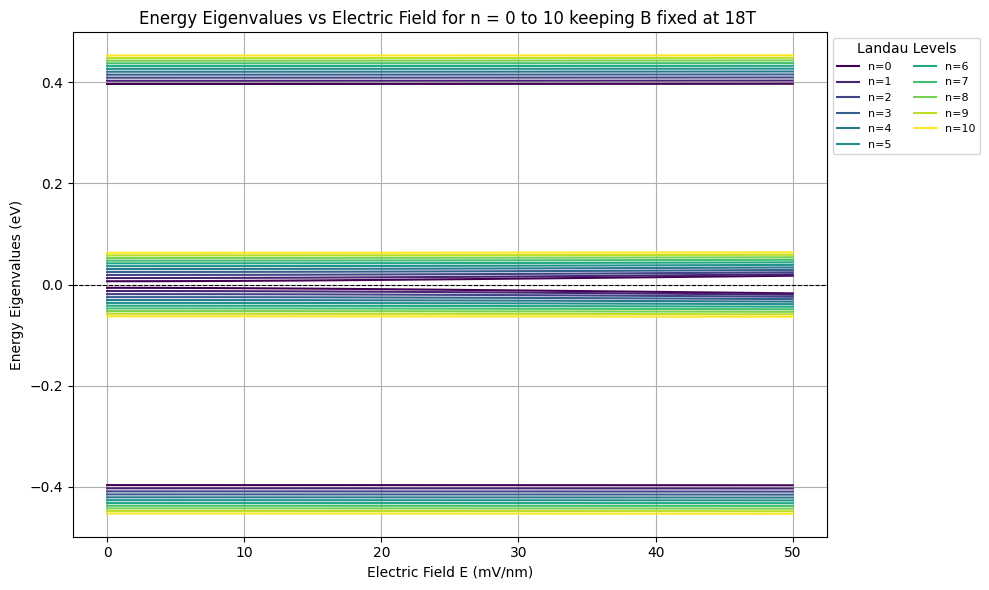

In [12]:
# Plotting

fig, ax = plt.subplots(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(n_values)))  # Color map for better visualization

for i, n in enumerate(n_values):
    for mode in range(4):  # There are 4 eigenvalues per n
        ax.plot(E_values, all_eigenvalues_B_const[i, :, mode], color=colors[i], label=f'n={n}' if mode == 0 else "")

ax.set_xlabel('Electric Field E (mV/nm)')
ax.set_ylabel('Energy Eigenvalues (eV)')
ax.set_title('Energy Eigenvalues vs Electric Field for n = 0 to 10 keeping B fixed at 18T ')
ax.axhline(0, color='k', linewidth=0.8, linestyle='--')  # Show zero energy level
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=2, fontsize=8, title="Landau Levels")
ax.grid()
plt.tight_layout()

# Save the figure
plt.savefig("energy_vs_E_at_const_B.pdf", dpi=300, bbox_inches="tight")  # Saves as Pdf

plt.show()

### Now considering Zeeman Splitting as well

In [13]:
## Constants

g = 2
mu_B = e * hbar / 2* m_e

In [14]:
# Function to construct the Hamiltonian matrix

def hamiltonian_matrix_B_const_ZS(n, potential_diff, omega_B_const):
    sqrt_n = np.sqrt(n)
    sqrt_n_plus_1 = np.sqrt(n + 1)
    hbar_omega_B_const_n = hbar * omega_B_const * sqrt_n
    hbar_omega_B_const_n_plus_1 = hbar * omega_B_const * sqrt_n_plus_1
    
    H_B_const_ZS = np.array([
        [potential_diff + g * mu_B * B_const, hbar_omega_B_const_n, 0, 0],
        [hbar_omega_B_const_n_plus_1, potential_diff + g * mu_B * B_const, gamma_1, 0],
        [0, gamma_1, - potential_diff + g * mu_B * B_const, hbar_omega_B_const_n],
        [0, 0, hbar_omega_B_const_n_plus_1, - potential_diff + g * mu_B * B_const]
    ])
    return H_B_const_ZS

def hamiltonian_matrix_E_const_ZS(n, potential_diff_const ,omega_B):
    sqrt_n = np.sqrt(n)
    sqrt_n_plus_1 = np.sqrt(n + 1)
    hbar_omega_B_n = hbar * omega_B * sqrt_n
    hbar_omega_B_n_plus_1 = hbar * omega_B * sqrt_n_plus_1
    
    H_E_const_ZS = np.array([
        [potential_diff_const + 0.5 * 0.041 * g * hbar * omega_B , hbar_omega_B_n, 0, 0],
        [hbar_omega_B_n_plus_1, potential_diff_const + 0.5 * 0.041 * g * hbar * omega_B, gamma_1, 0],
        [0, gamma_1, - potential_diff_const + 0.5 * 0.041 * g * hbar * omega_B, hbar_omega_B_n],
        [0, 0, hbar_omega_B_n_plus_1, - potential_diff_const + 0.5 * 0.041 * g * hbar * omega_B]
    ])
    return H_E_const_ZS

In [15]:
# Store eigenvalues for all n

all_eigenvalues_E_const_ZS = np.zeros((len(n_values), len(B_values), 4))
all_eigenvalues_B_const_ZS = np.zeros((len(n_values), len(E_values), 4))

In [16]:
# Compute eigenvalues considering E is constant

potential_diff_const = e * E_const * d

for i, n in enumerate(n_values):
    for j, B in enumerate(B_values):
        omega_B = e * B / m_eff
        H_E_const_ZS = hamiltonian_matrix_E_const_ZS(n, potential_diff_const ,omega_B)
        eigvals_E_const_ZS = np.linalg.eigvalsh(H_E_const_ZS) / e  # Convert to eV
        all_eigenvalues_E_const_ZS[i, j, :] = eigvals_E_const_ZS

# Compute eigenvalues considering B is constant

omega_B_const = e * B_const / m_eff

for i, n in enumerate(n_values):
    for j, E in enumerate(E_values):
        potential_diff = e * E * 1e6 * d  ## converting unit of E from mV/nm to V/m
        H_B_const_ZS = hamiltonian_matrix_B_const_ZS(n, potential_diff ,omega_B_const)
        eigvals_B_const_ZS = np.linalg.eigvalsh(H_B_const_ZS) / e  # Convert to eV
        all_eigenvalues_B_const_ZS[i, j, :] = eigvals_B_const_ZS

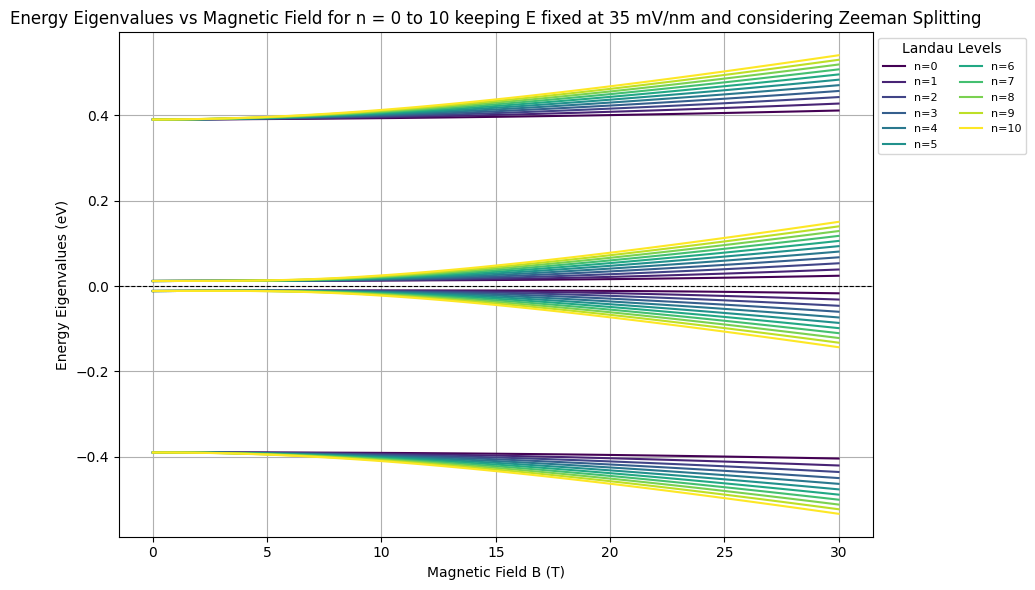

In [17]:
# Plotting

fig, ax = plt.subplots(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(n_values)))  # Color map for better visualization

for i, n in enumerate(n_values):
    for mode in range(4):  # There are 4 eigenvalues per n
        ax.plot(B_values, all_eigenvalues_E_const_ZS[i, :, mode], color=colors[i], label=f'n={n}' if mode == 0 else "")

ax.set_xlabel('Magnetic Field B (T)')
ax.set_ylabel('Energy Eigenvalues (eV)')
ax.set_title('Energy Eigenvalues vs Magnetic Field for n = 0 to 10 keeping E fixed at 35 mV/nm and considering Zeeman Splitting')
ax.axhline(0, color='k', linewidth=0.8, linestyle='--')  # Show zero energy level
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=2, fontsize=8, title="Landau Levels")
ax.grid()
plt.tight_layout()

# Save the figure
plt.savefig("energy_vs_B_at_const_E_and_ZS.pdf", dpi=300, bbox_inches="tight")  # Saves as Pdf

plt.show()

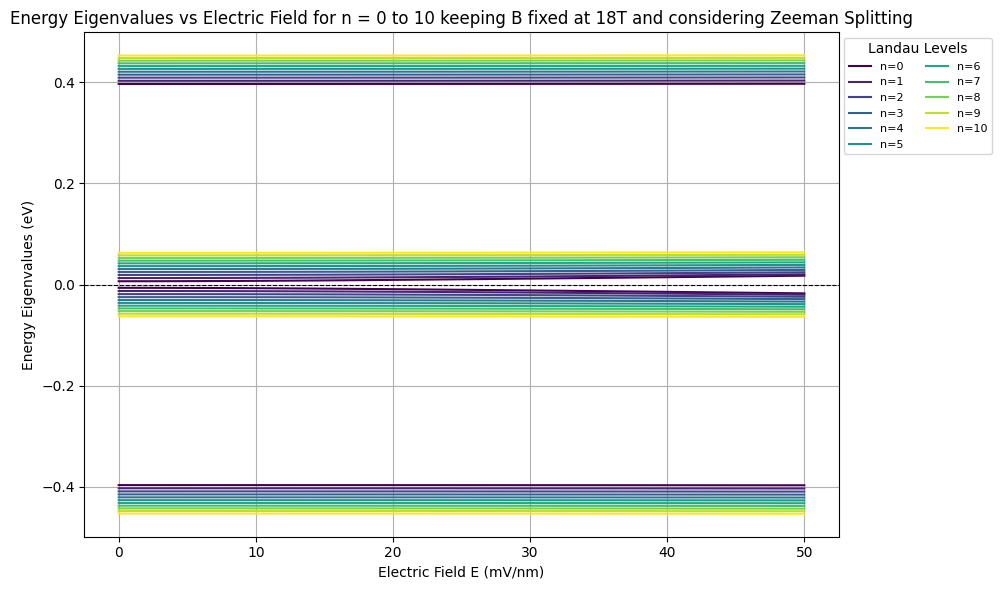

In [18]:
# Plotting

fig, ax = plt.subplots(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(n_values)))  # Color map for better visualization

for i, n in enumerate(n_values):
    for mode in range(4):  # There are 4 eigenvalues per n
        ax.plot(E_values, all_eigenvalues_B_const_ZS[i, :, mode], color=colors[i], label=f'n={n}' if mode == 0 else "")

ax.set_xlabel('Electric Field E (mV/nm)')
ax.set_ylabel('Energy Eigenvalues (eV)')
ax.set_title('Energy Eigenvalues vs Electric Field for n = 0 to 10 keeping B fixed at 18T and considering Zeeman Splitting')
ax.axhline(0, color='k', linewidth=0.8, linestyle='--')  # Show zero energy level
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=2, fontsize=8, title="Landau Levels")
ax.grid()
plt.tight_layout()

# Save the figure
plt.savefig("energy_vs_E_at_const_B_and_ZS.pdf", dpi=300, bbox_inches="tight")  # Saves as Pdf

plt.show()